In [2]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import csv file

df = pd.read_csv("E:\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# ETL Process...(Data Cleaning)

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [8]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'],axis = 1, inplace = True)

In [11]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# drop null values
df.dropna(inplace = True)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [15]:
# change data type
df['Amount'] = df['Amount'].astype(int)

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [23]:
#rename column
df.rename(columns = {'Marital_Status':'Mar_Status'}, inplace = True)

In [24]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Mar_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [22]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EDA - Exploratory Data Analysis

### Gender

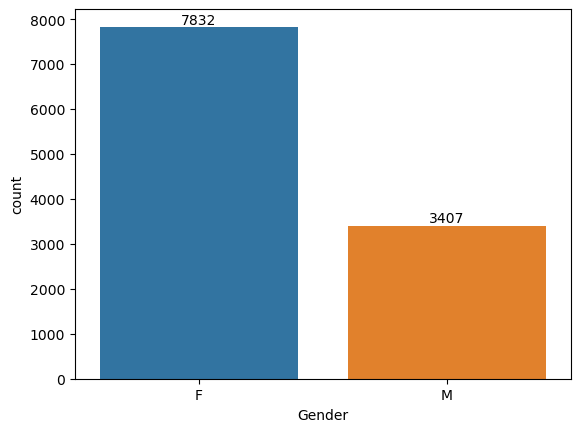

In [26]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

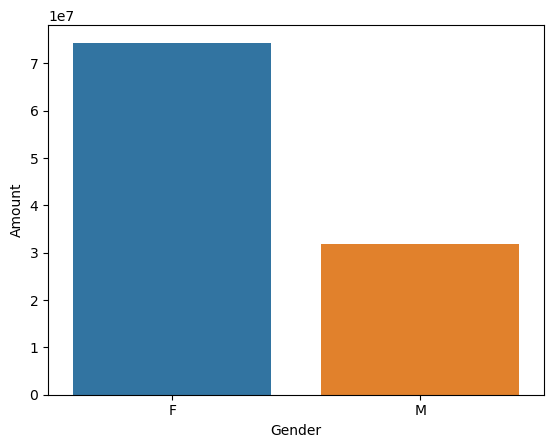

In [28]:
# plotting a bar chart for gender vs total amount

Sales_Gender = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = Sales_Gender)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

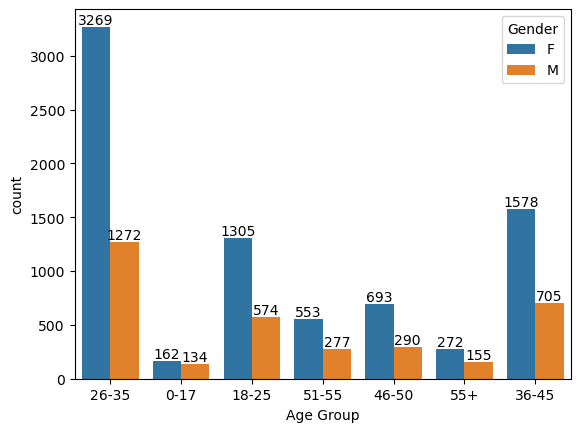

In [31]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

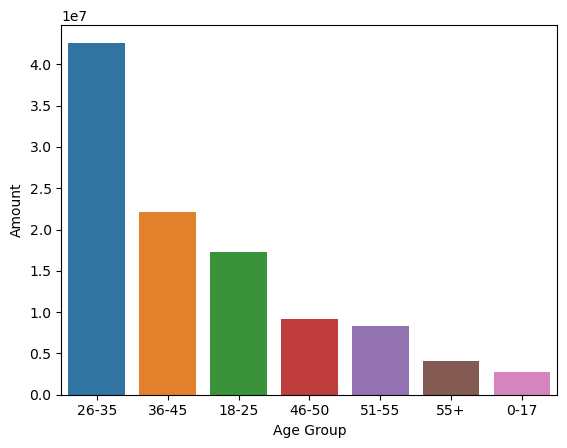

In [32]:
# Total Amount vs Age Group

Sales_Age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = Sales_Age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

### State

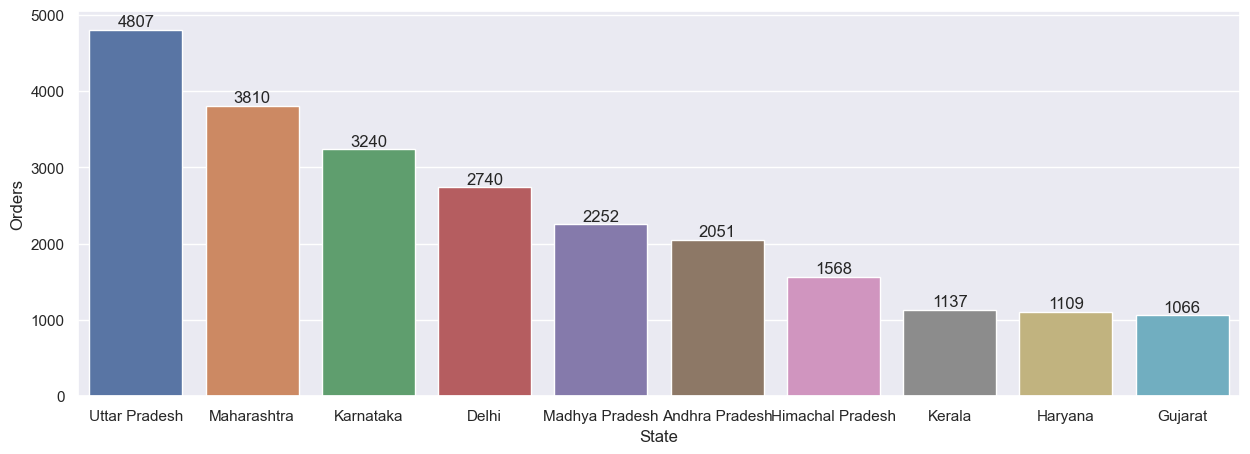

In [57]:
# total number of orders from top 10 states

State_Ord = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,5)})
ax = sns.barplot(x = 'State', y = 'Orders', data = State_Ord)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='State', ylabel='Amount'>

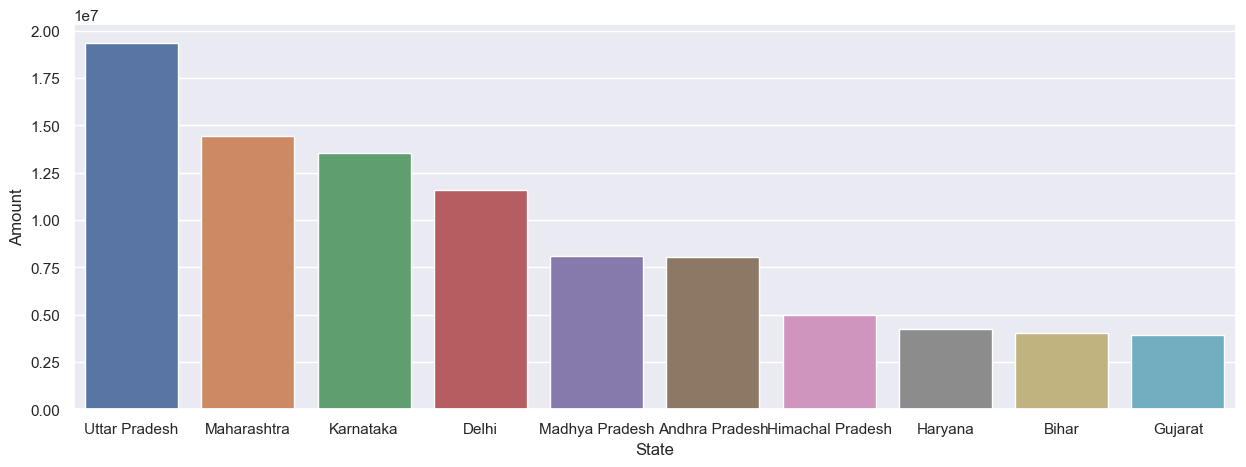

In [37]:
# total amount/sales from top 10 states

Sales_State = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'State', y = 'Amount', data = Sales_State)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### Marital Status

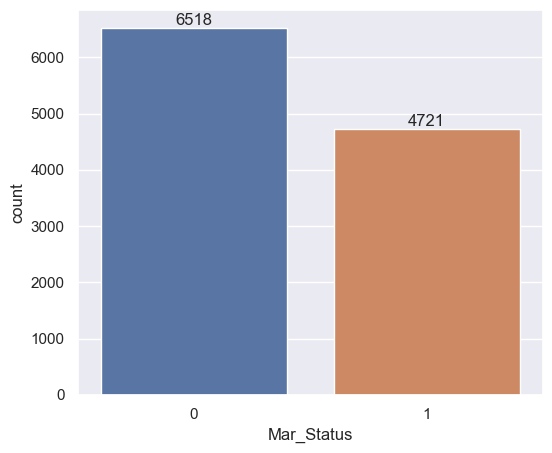

In [40]:
# plotting a bar chart for Mar_Status and it's count

sns.set(rc = {'figure.figsize':(6,5)})
ax = sns.countplot(x = 'Mar_Status', data = df)

for bars in ax.containers:
    ax.bar_label(bars) 

<AxesSubplot:xlabel='Mar_Status', ylabel='Amount'>

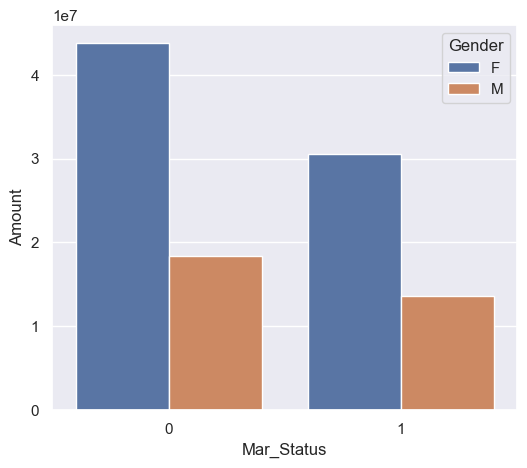

In [43]:
# Total Amount v/s Mar_Status and Gender

Sales_Mar_Sts = df.groupby(['Mar_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Mar_Status', y = 'Amount', data = Sales_Mar_Sts, hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.

### Occupation

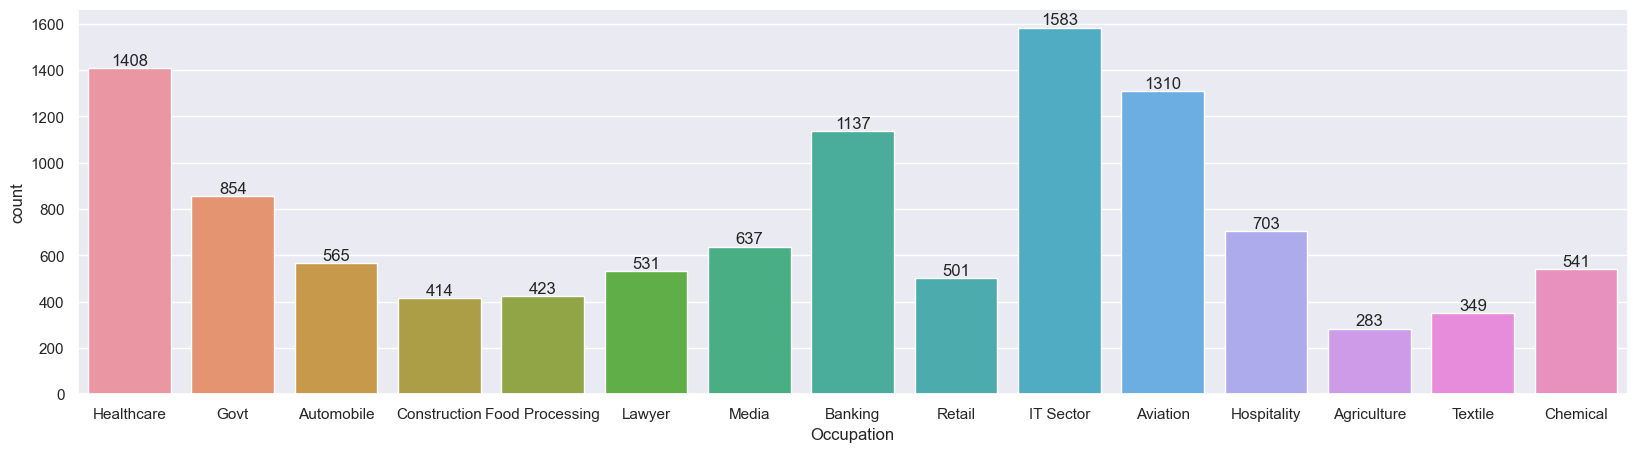

In [46]:
# plotting a bar chart for Occupations and it's count

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

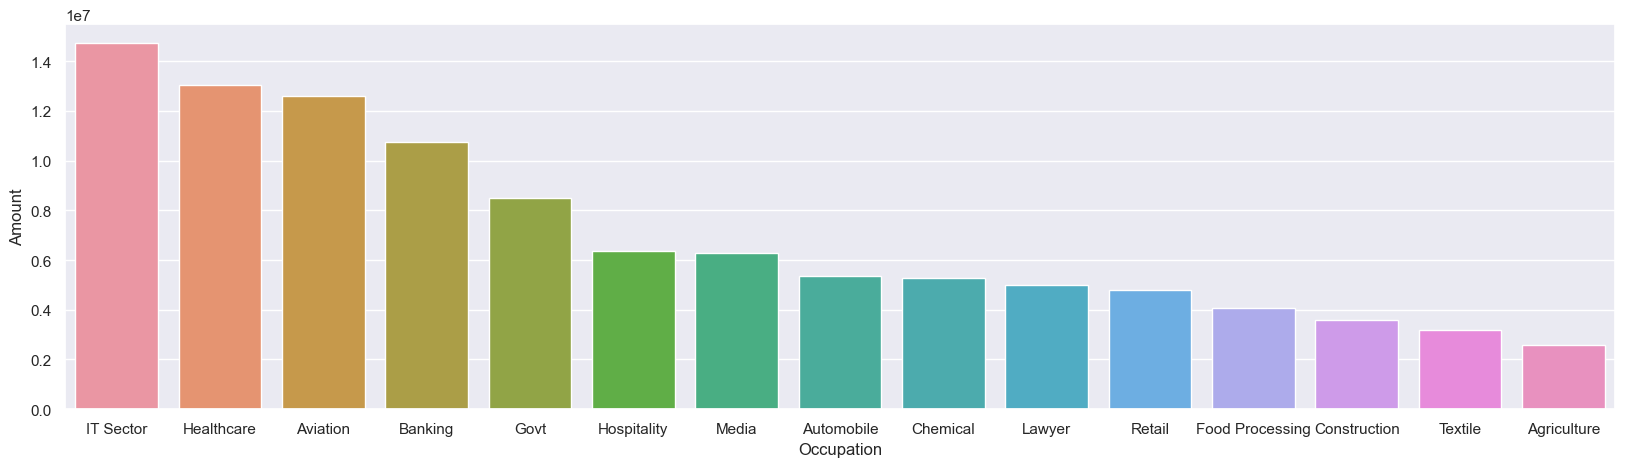

In [47]:
# Total Amount vs Occupation

Sales_Occp = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Occupation', y = 'Amount', data = Sales_Occp)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.

# Product Category

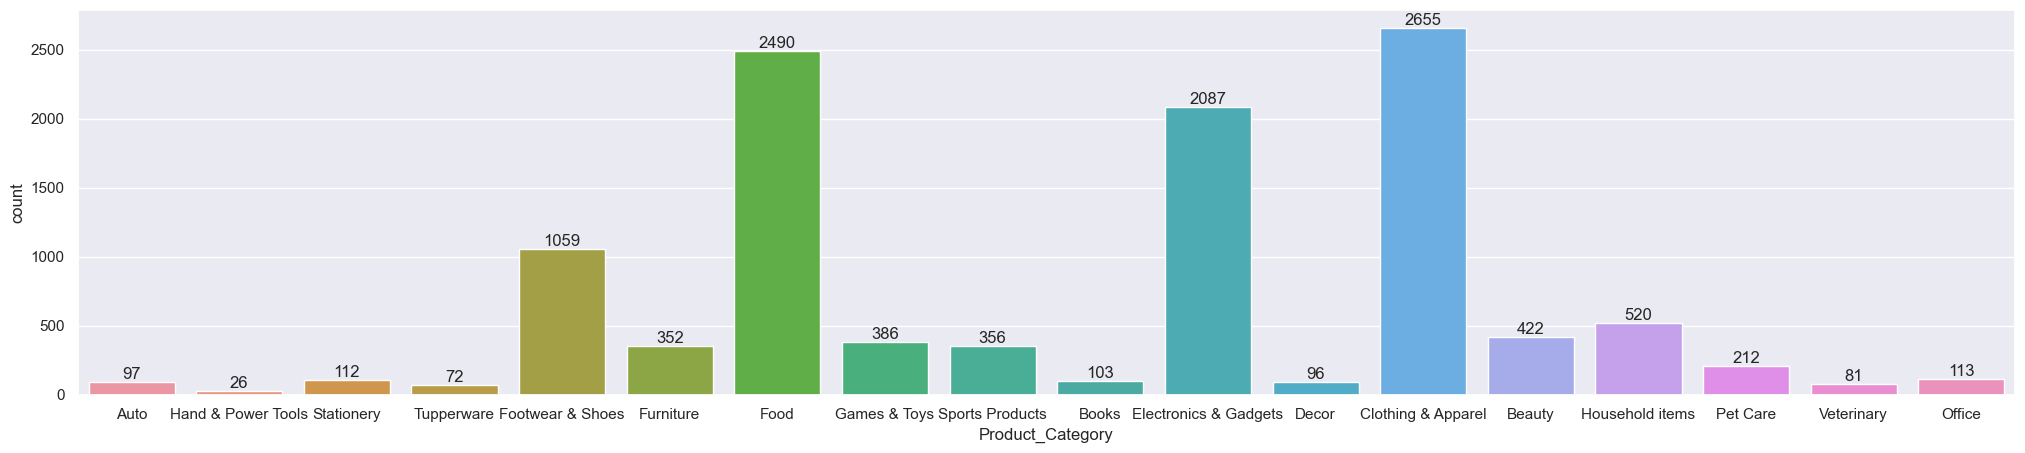

In [50]:
# plotting a bar chart for Product_category and it's count

sns.set(rc = {'figure.figsize':(25,5)})

ax = sns.countplot(x = 'Product_Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

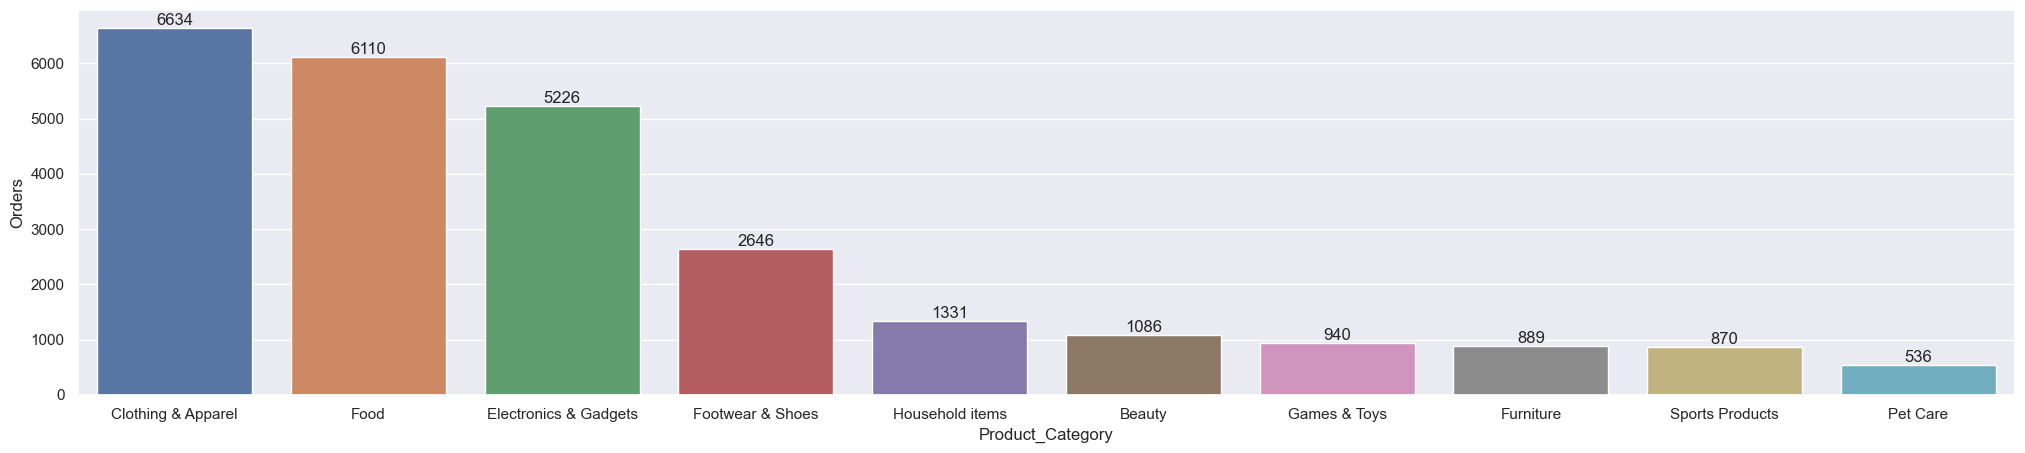

In [56]:
# Total Orders vs Product_Category

Prd_Cat_Ord = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

ax = sns.barplot(x = 'Product_Category', y = 'Orders', data = Prd_Cat_Ord)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

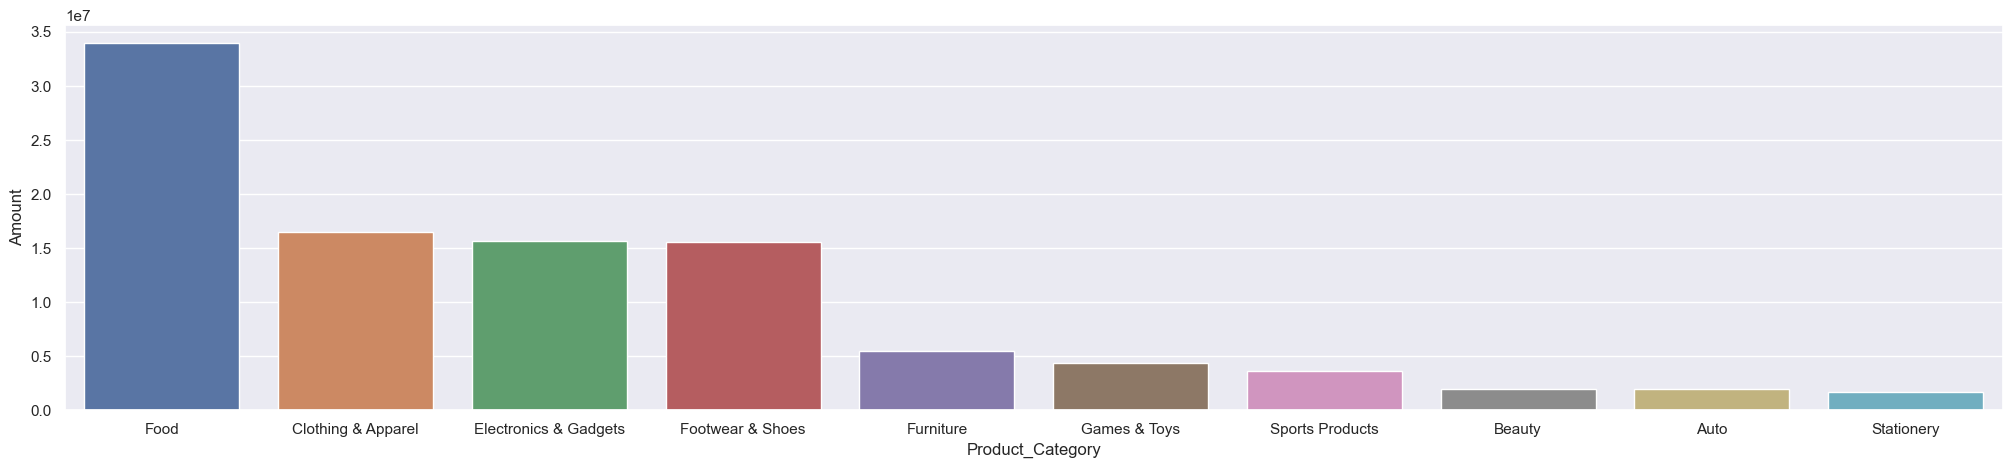

In [53]:
# Total Amount/Sales vs Product_Category

Sales_Prd_Cat = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'Product_Category', y = 'Amount', data = Sales_Prd_Cat)

*From above charts we can see that most Orders are from clothing, food and electric gadgets but most sales is Food Category.

### Zone

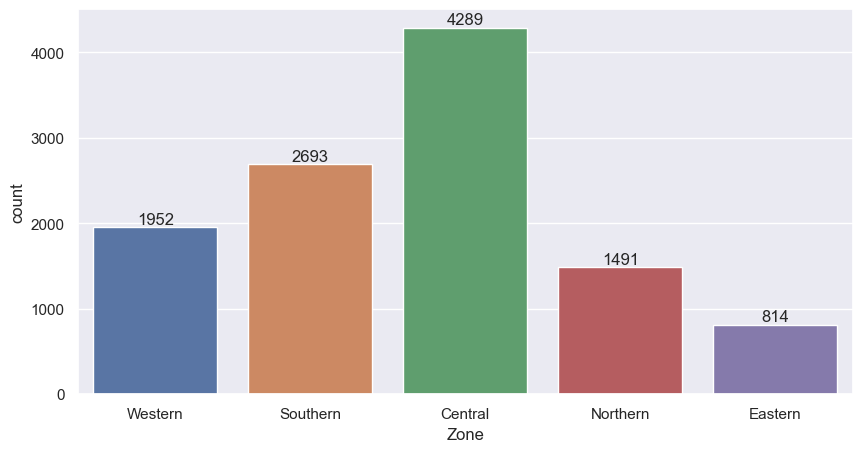

In [61]:
# plotting a bar chart for Zones and it's count

sns.set(rc = {'figure.figsize':(10,5)})
ax = sns.countplot(x = 'Zone', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Zone', ylabel='Amount'>

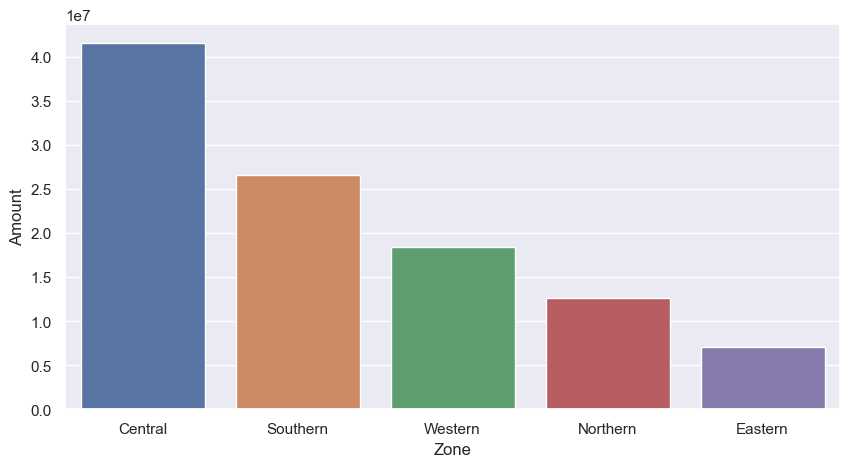

In [63]:
# Total Amount/Sales vs Zones

Sales_Zone = df.groupby(['Zone'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Zone', y = 'Amount', data = Sales_Zone)

*From the above charts we can see that most orders and Sales are from Central Zone.

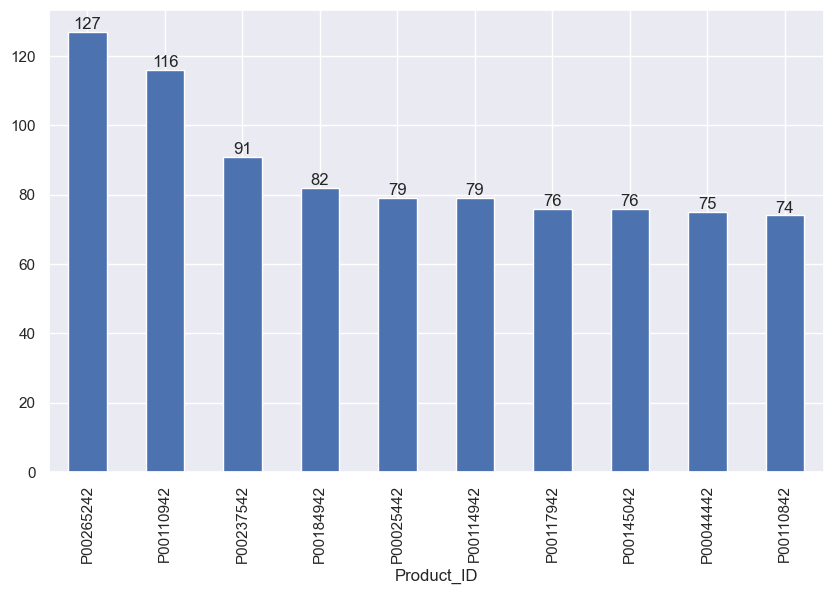

In [75]:
# top 10 most sold products

ax = plt.subplots(figsize = (10,6))
ax1 = df.groupby(['Product_ID'])['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

for bars in ax1.containers:
    ax1.bar_label(bars)

# Conclusion:

*Married women age group 26-35 yrs from Central Zone(UP, Maharastra and Karnataka) working in IT, Healthcare and Aviation Sector are more likely to buy products from Food, Clothing and Electronics category.